In [1]:
import numpy as np

In [2]:
b = 1.41

def f_x(X, beta): 
    return X[0]**2 + beta * X[0] * X[1] + X[1]**2 + beta * X[1] * X[2] + X[2]**2

def calcule_gradient(X, beta):
    return np.array([2 * X[0] + beta * X[1], 2 * X[1] + beta * X[0] + beta * X[2], 2 * X[2] + beta * X[1]])

def calculate_gradient_descent(X, beta, alpha, maxIter):
    theta = np.array(X)
    for _ in range(maxIter): 
        theta = theta - calcule_gradient(theta, beta) * alpha
    return theta

In [3]:
X = [1.0, 2.0, 3.0]  # I
# beta = 1.41
beta = 0.11
alpha = 0.1
maxIter = 10000

result = calculate_gradient_descent(X, beta, alpha, maxIter)
print(result)


[ 1.e-323 -1.e-323  1.e-323]


In [19]:
def linear_search(beta):
    r=1
    xn=np.array([1,1,1])
    phi0 = f_x(xn, beta)
    while True:
        phir = f_x(xn-r*calcule_gradient(xn,beta), beta)
        phi2r = f_x(xn-2*r*calcule_gradient(xn,beta), beta)
        if phi0 > phir and phir>phi2r : 
            break
        r = r /2
    taux = 2*r
    while True:
        phi_taux_r = f_x(xn-(r+taux)*calcule_gradient(xn,beta), beta)
        phi_taux = f_x(xn-(taux)*calcule_gradient(xn,beta), beta)
        if phi_taux_r >= phi_taux : 
            break
        taux = taux+r
    return taux



def calculate_gradient_descent_var(X, beta, alpha, maxIter):
    a = alpha
    theta = np.array(X)
    for _ in range(maxIter): 
        a = linear_search(a)
        theta = theta - calcule_gradient(theta, beta) * alpha
    return theta
X = [1.0, 2.0, 3.0]  
beta = 0.11
alpha = 0.1
maxIter = 10000

result = calculate_gradient_descent_var(X, beta, alpha, maxIter)
print(result)

[ 1.e-323 -1.e-323  1.e-323]


In [20]:
def calcule_hessien(X, beta):
    return np.array([
        [2, beta, 0],
        [beta, 2, beta],
        [0, beta, 2]
    ])

def calculate_newton_descent(X, beta, maxIter):
    theta = np.array(X)
    for _ in range(maxIter): 
        grad = calcule_gradient(theta, beta)
        hessien = calcule_hessien(theta, beta)
        try:
            hessien_inv = np.linalg.inv(hessien)
        except np.linalg.LinAlgError:
            print("Le hessien est singulier et ne peut pas être inversé.")
            break
        step = hessien_inv.dot(grad)
        theta = theta - step
    return theta

X = [1.0, 2.0, 3.0]  
beta = 0.11
maxIter = 10000

result = calculate_newton_descent(X, beta, maxIter)
print("Résultat avec méthode de Newton :", result)

Résultat avec méthode de Newton : [0. 0. 0.]


## mery

[[1.00000000e+00 2.00000000e+00 3.00000000e+00]
 [8.90000000e-01 1.78000000e+00 2.67000000e+00]
 [7.92100000e-01 1.58420000e+00 2.37630000e+00]
 [7.04969000e-01 1.40993800e+00 2.11490700e+00]
 [6.27422410e-01 1.25484482e+00 1.88226723e+00]
 [5.58405945e-01 1.11681189e+00 1.67521783e+00]
 [4.96981291e-01 9.93962582e-01 1.49094387e+00]
 [4.42313349e-01 8.84626698e-01 1.32694005e+00]
 [3.93658881e-01 7.87317761e-01 1.18097664e+00]
 [3.50356404e-01 7.00712807e-01 1.05106921e+00]
 [3.11817199e-01 6.23634399e-01 9.35451598e-01]
 [2.77517307e-01 5.55034615e-01 8.32551922e-01]
 [2.46990404e-01 4.93980807e-01 7.40971211e-01]
 [2.19821459e-01 4.39642918e-01 6.59464378e-01]
 [1.95641099e-01 3.91282197e-01 5.86923296e-01]
 [1.74120578e-01 3.48241156e-01 5.22361733e-01]
 [1.54967314e-01 3.09934629e-01 4.64901943e-01]
 [1.37920910e-01 2.75841819e-01 4.13762729e-01]
 [1.22749610e-01 2.45499219e-01 3.68248829e-01]
 [1.09247153e-01 2.18494305e-01 3.27741458e-01]
 [9.72299658e-02 1.94459932e-01 2.916898

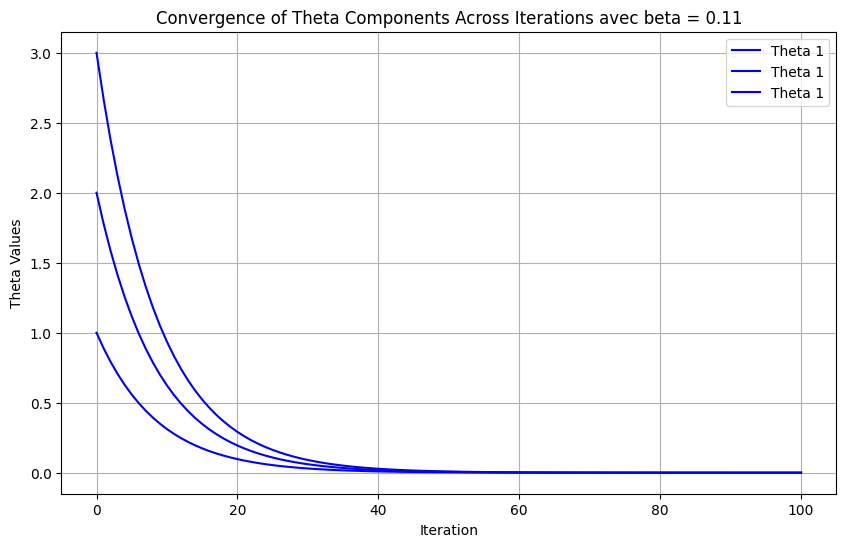

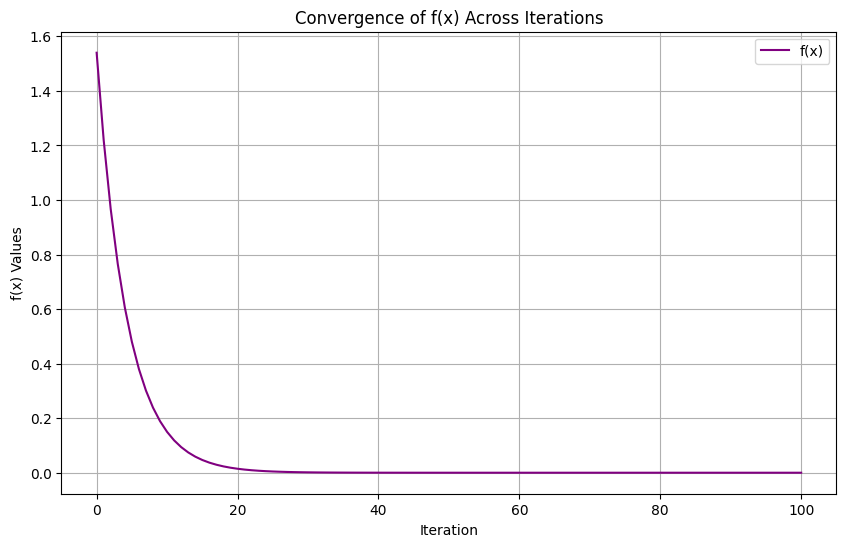

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def linear_search(beta):
    r = 1
    xn = np.array([1, 1, 1])
    phi0 = f_x(xn, beta)
    while True:
        phir = f_x(xn - r * calcule_gradient(xn, beta), beta)
        phi2r = f_x(xn - 2 * r * calcule_gradient(xn, beta), beta)
        if phi0 > phir and phir > phi2r:
            break
        r /= 2
    taux = 2 * r
    while True:
        phi_taux_r = f_x(xn - (r + taux) * calcule_gradient(xn, beta), beta)
        phi_taux = f_x(xn - taux * calcule_gradient(xn, beta), beta)
        if phi_taux_r >= phi_taux:
            break
        taux += r
    return taux

def calculate_gradient_descent_var(X, beta, alpha, maxIter):
    a = alpha
    theta = np.array(X)
    thetas = [theta.copy()]  # Store initial theta

    for _ in range(maxIter): 
        a = linear_search(a)
        theta = theta - calcule_gradient(theta, beta) * alpha
        thetas.append(theta.copy())  # Store each theta

    return theta, thetas

# Initial parameters
X = [1.0, 2.0, 3.0]
beta = 0.11
alpha = 0.5
maxIter = 100

# Run gradient descent
result, thetas = calculate_gradient_descent_var(X, beta, alpha, maxIter)

# Convert list of thetas to numpy array for plotting
thetas = np.array(thetas)
print(thetas)

# Plotting theta components against iteration count
iterations = np.arange(len(thetas))

plt.figure(figsize=(10, 6))

# Plot each component of theta across iterations
plt.plot(iterations, thetas, label="Theta 1", color='blue')

# Labels and title
plt.xlabel("Iteration")
plt.ylabel("Theta Values")
plt.title("Convergence of Theta Components Across Iterations avec beta = 0.11")
plt.legend()
plt.grid(True)

plt.show()

# Calculate f(x) for each theta in thetas
fx_values = [f_x(theta, beta) for theta in thetas]

# Plotting f(x) values against iteration count
plt.figure(figsize=(10, 6))

# Plot f(x) convergence
plt.plot(iterations, fx_values, label="f(x)", color='purple')

# Labels and title
plt.xlabel("Iteration")
plt.ylabel("f(x) Values")
plt.title("Convergence of f(x) Across Iterations")
plt.legend()
plt.grid(True)

plt.show()

[[ 1.00000000e+00  2.00000000e+00  3.00000000e+00]
 [-4.10000000e-01 -8.20000000e-01 -1.23000000e+00]
 [ 1.68100000e-01  3.36200000e-01  5.04300000e-01]
 [-6.89210000e-02 -1.37842000e-01 -2.06763000e-01]
 [ 2.82576100e-02  5.65152200e-02  8.47728300e-02]
 [-1.15856201e-02 -2.31712402e-02 -3.47568603e-02]
 [ 4.75010424e-03  9.50020848e-03  1.42503127e-02]
 [-1.94754274e-03 -3.89508548e-03 -5.84262822e-03]
 [ 7.98492523e-04  1.59698505e-03  2.39547757e-03]
 [-3.27381934e-04 -6.54763869e-04 -9.82145803e-04]
 [ 1.34226593e-04  2.68453186e-04  4.02679779e-04]
 [-5.50329032e-05 -1.10065806e-04 -1.65098710e-04]
 [ 2.25634903e-05  4.51269806e-05  6.76904709e-05]
 [-9.25103102e-06 -1.85020620e-05 -2.77530931e-05]
 [ 3.79292272e-06  7.58584544e-06  1.13787682e-05]
 [-1.55509831e-06 -3.11019663e-06 -4.66529494e-06]
 [ 6.37590309e-07  1.27518062e-06  1.91277093e-06]
 [-2.61412027e-07 -5.22824054e-07 -7.84236080e-07]
 [ 1.07178931e-07  2.14357862e-07  3.21536793e-07]
 [-4.39433617e-08 -8.78867234e-

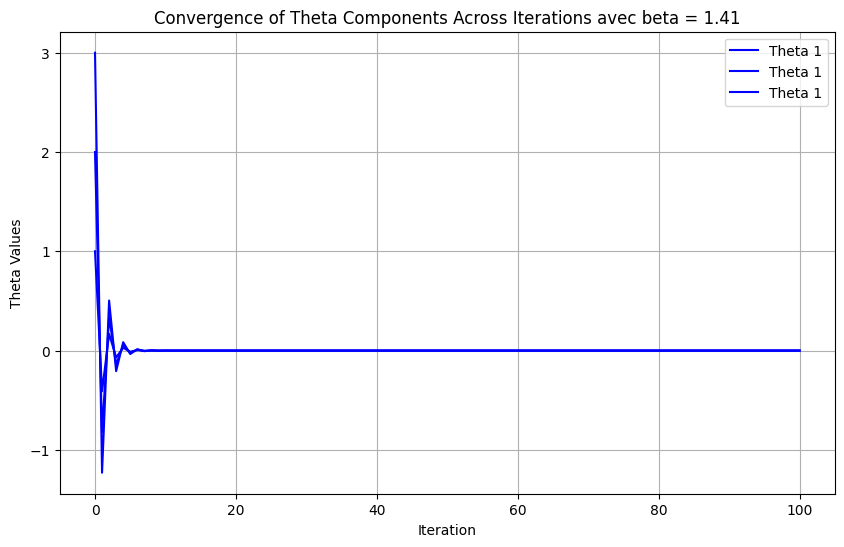

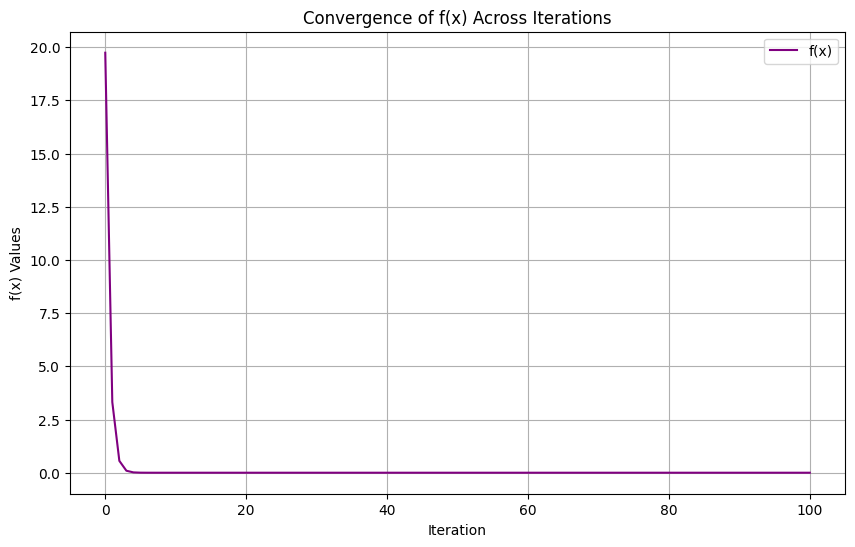

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def linear_search(beta):
    r = 1
    xn = np.array([1, 1, 1])
    phi0 = f_x(xn, beta)
    while True:
        phir = f_x(xn - r * calcule_gradient(xn, beta), beta)
        phi2r = f_x(xn - 2 * r * calcule_gradient(xn, beta), beta)
        if phi0 > phir and phir > phi2r:
            break
        r /= 2
    taux = 2 * r
    while True:
        phi_taux_r = f_x(xn - (r + taux) * calcule_gradient(xn, beta), beta)
        phi_taux = f_x(xn - taux * calcule_gradient(xn, beta), beta)
        if phi_taux_r >= phi_taux:
            break
        taux += r
    return taux

def calculate_gradient_descent_var(X, beta, alpha, maxIter):
    a = alpha
    theta = np.array(X)
    thetas = [theta.copy()]  # Store initial theta

    for _ in range(maxIter): 
        a = linear_search(a)
        theta = theta - calcule_gradient(theta, beta) * alpha
        thetas.append(theta.copy())  # Store each theta

    return theta, thetas

# Initial parameters
X = [1.0, 2.0, 3.0]
beta = 1.41
alpha = 0.5
maxIter = 100

# Run gradient descent
result, thetas = calculate_gradient_descent_var(X, beta, alpha, maxIter)

# Convert list of thetas to numpy array for plotting
thetas = np.array(thetas)
print(thetas)

# Plotting theta components against iteration count
iterations = np.arange(len(thetas))

plt.figure(figsize=(10, 6))

# Plot each component of theta across iterations
plt.plot(iterations, thetas, label="Theta 1", color='blue')

# Labels and title
plt.xlabel("Iteration")
plt.ylabel("Theta Values")
plt.title("Convergence of Theta Components Across Iterations avec beta = 1.41")
plt.legend()
plt.grid(True)

plt.show()

# Calculate f(x) for each theta in thetas
fx_values = [f_x(theta, beta) for theta in thetas]

# Plotting f(x) values against iteration count
plt.figure(figsize=(10, 6))

# Plot f(x) convergence
plt.plot(iterations, fx_values, label="f(x)", color='purple')

# Labels and title
plt.xlabel("Iteration")
plt.ylabel("f(x) Values")
plt.title("Convergence of f(x) Across Iterations")
plt.legend()
plt.grid(True)

plt.show()

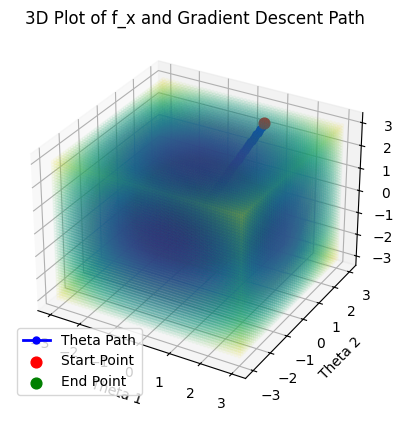

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Assuming the `thetas` array from `calculate_gradient_descent_var` is already available
# and `f_x` function is defined.

# Plot setup
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define a 3D grid for X, Y, and Z
x_vals = np.linspace(-3, 3, 50)
y_vals = np.linspace(-3, 3, 50)
z_vals = np.linspace(-3, 3, 50)
X_grid, Y_grid, Z_grid = np.meshgrid(x_vals, y_vals, z_vals)
F_grid = f_x([X_grid, Y_grid, Z_grid], beta)  # Compute f_x over the grid

# Plot the 3D surface of f_x as a volume
ax.scatter(X_grid, Y_grid, Z_grid, c=F_grid.flatten(), cmap='viridis', alpha=0.05, marker='.')

# Plot the gradient descent path of theta values
thetas = np.array(thetas)  # Convert to numpy array if not already
ax.plot(thetas[:, 0], thetas[:, 1], thetas[:, 2], marker='o', color='blue', markersize=5, label="Theta Path", lw=2)

# Mark the starting and ending points of theta path
ax.scatter(thetas[0, 0], thetas[0, 1], thetas[0, 2], color="red", s=60, label="Start Point")
ax.scatter(thetas[-1, 0], thetas[-1, 1], thetas[-1, 2], color="green", s=60, label="End Point")

# Set labels
ax.set_xlabel("Theta 1")
ax.set_ylabel("Theta 2")
ax.set_zlabel("Theta 3")
ax.set_title("3D Plot of f_x and Gradient Descent Path")

# Add legend
plt.legend()
plt.show()
